In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from arc import*
import matplotlib.ticker as ticker
# atom = Rubidium85()

In [2]:
df = df = pd.read_csv('GS:6_3_3.5.csv')

In [3]:
df

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
0,6,3,3.5,7,3,2.5,9,4,3.5,0.6694,0.5884,3,7,18284.8535,2.0752
1,6,3,3.5,7,3,2.5,14,4,3.5,0.6694,0.1731,55,133,3307.7658,3.0384
2,6,3,3.5,7,1,1.5,14,2,2.5,1.0000,0.8654,3,7,4442.4161,3.0449
3,6,3,3.5,8,1,1.5,9,2,2.5,0.1736,0.5365,55,133,4130.7172,2.2688
4,6,3,3.5,7,3,2.5,13,4,3.5,0.5041,0.9519,1,1,3486.2189,2.8864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66012,6,3,3.5,7,3,3.5,14,4,3.5,0.1736,0.2769,3,7,692.5575,2.0334
66013,6,3,3.5,7,1,1.5,14,2,2.5,0.8347,0.6231,37,85,975.8962,6.1818
66014,6,3,3.5,7,3,2.5,14,4,3.5,0.3388,0.0865,19,41,2339.0590,3.0673
66015,6,3,3.5,7,1,1.5,9,2,2.5,0.6694,0.1904,3,6,17666.4543,2.1478


In [4]:
np.unique(df.Rfq.values).shape

(2450,)

In [5]:
np.unique(df.Rfq.values)

array([2.23395000e+01, 4.13684000e+01, 5.34945000e+01, ...,
       2.81494101e+04, 2.82722114e+04, 2.91405097e+04])

In [6]:
df = df[(df['Z']==37) & (df['A']==87)]

In [7]:
# df = df[(df['Rfq']==2.82722114e+04)]

In [8]:
df

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
6,6,3,3.5,7,1,1.5,10,2,2.5,0.1736,0.9346,37,87,887.2346,2.8445
12,6,3,3.5,7,1,1.5,12,2,2.5,1.0000,0.8827,37,87,1444.4674,6.6746
32,6,3,3.5,9,1,1.5,14,2,2.5,0.5041,0.2077,37,87,1409.6458,2.6507
34,6,3,3.5,7,3,2.5,14,4,3.5,0.3388,0.0519,37,87,2341.1232,3.0741
45,6,3,3.5,7,1,1.5,13,2,2.5,0.5041,0.5019,37,87,874.6228,3.4275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65953,6,3,3.5,7,3,2.5,11,4,3.5,0.8347,0.8480,37,87,7757.8202,2.5952
65954,6,3,3.5,7,3,3.5,14,4,4.5,0.0083,0.2423,37,87,284.3753,2.0858
65963,6,3,3.5,8,1,1.5,14,2,2.5,0.1736,0.7615,37,87,613.2519,3.7983
65975,6,3,3.5,9,1,1.5,14,2,2.5,0.5041,0.5711,37,87,1409.6458,2.2737


In [9]:
atom = Rubidium87()

In [10]:
df

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
6,6,3,3.5,7,1,1.5,10,2,2.5,0.1736,0.9346,37,87,887.2346,2.8445
12,6,3,3.5,7,1,1.5,12,2,2.5,1.0000,0.8827,37,87,1444.4674,6.6746
32,6,3,3.5,9,1,1.5,14,2,2.5,0.5041,0.2077,37,87,1409.6458,2.6507
34,6,3,3.5,7,3,2.5,14,4,3.5,0.3388,0.0519,37,87,2341.1232,3.0741
45,6,3,3.5,7,1,1.5,13,2,2.5,0.5041,0.5019,37,87,874.6228,3.4275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65953,6,3,3.5,7,3,2.5,11,4,3.5,0.8347,0.8480,37,87,7757.8202,2.5952
65954,6,3,3.5,7,3,3.5,14,4,4.5,0.0083,0.2423,37,87,284.3753,2.0858
65963,6,3,3.5,8,1,1.5,14,2,2.5,0.1736,0.7615,37,87,613.2519,3.7983
65975,6,3,3.5,9,1,1.5,14,2,2.5,0.5041,0.5711,37,87,1409.6458,2.2737


In [11]:
# Sort the DataFrame by the 'T0' column
sorted_df = df.sort_values(by='T0')

# Select the first and last rows
df = sorted_df.iloc[[0, -1]]



In [12]:
df

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
55482,6,3,3.5,8,1,1.5,10,2,2.5,1.0000,0.7788,37,87,3193.6063,2.0028
3843,6,3,3.5,7,1,1.5,14,2,2.5,0.0083,1.0211,37,87,97.1053,48.6157


In [13]:
df.n3.values[0]

10

Text(0.5, 0, '$\\Omega$')

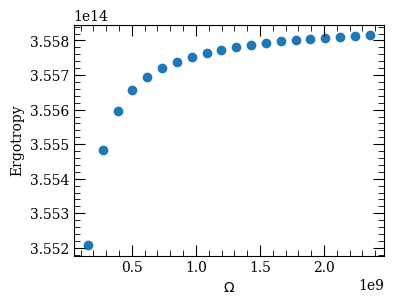

In [14]:
# Constants
hbar = 1.0545718e-34  # Reduced Planck constant, in J*s
k_b = 1.380649e-23  
Gamma31 = atom.getTransitionRate(df.n3.values[0],df.l3.values[0],df.j3.values[0],df.n1.values[0],df.l1.values[0],df.j1.values[0],df.Te.values[0]*5778)         # Given constant (unit/s)
Gamma23 = atom.getTransitionRate(df.n2.values[0],df.l2.values[0],df.j2.values[0],df.n3.values[0],df.l3.values[0],df.j3.values[0],df.Te.values[0]*5778)       # Given constant (unit/s)
omega13 = atom.getTransitionFrequency(df.n1.values[0],df.l1.values[0],df.j1.values[0],df.n3.values[0],df.l3.values[0],df.j3.values[0])      # Angular frequency for transition 13, in Hz
omega23 = atom.getTransitionFrequency(df.n2.values[0],df.l2.values[0],df.j2.values[0],df.n3.values[0],df.l3.values[0],df.j3.values[0])      # Angular frequency for transition 23, in Hz
T13 = df.Te.values[0]*5778       # Temperature for transition 13, in K
T23 = df.Te.values[0]*5778            # Temperature for transition 23, in K

# Compute R13 and R23
R13 = Gamma31 / (np.exp((hbar * omega13) / (k_b * T13)) - 1)
R23 = Gamma23 / (np.exp((hbar * omega23) / (k_b * T23)) - 1)


Omega = np.linspace(1e8,15e8,20)/2*np.pi

sol_rho1 = np.array((Omega + R23)/(2*Omega + 3*R23))
sol_rho2 = np.array(R23/(2*Omega + 3*R23))
sol_rho3 = np.array((Omega + R23)/(2*Omega + 3*R23))
e_1 = atom.getEnergy(df.n1.values[0],df.l1.values[0],df.j1.values[0])*2.41804*10e14 #converted to Hz.
e_2 = atom.getEnergy(df.n2.values[0],df.l2.values[0],df.j2.values[0])*2.41804*10e14 #converted to Hz.
e_3 = atom.getEnergy(df.n3.values[0],df.l3.values[0],df.j3.values[0])*2.41804*10e14 #converted to Hz.
result_matrix_energy = [np.diag([e_1, e_2, e_3])]
result_matrix_pop_ss = [np.diag([sol_rho1[i], sol_rho2[i], sol_rho3[i]]) for i in range(len(Omega))]
result_final_population = np.matmul(result_matrix_energy,result_matrix_pop_ss)

def sort_diagonal(matrix_list):
    sorted_matrices = []

    for matrix in matrix_list:
        # Extract diagonal elements
        diagonal = np.diagonal(matrix)

        # Sort diagonal elements in decreasing order
        sorted_diagonal = np.sort(diagonal)[::-1]

        # Replace diagonal elements with sorted values
        sorted_matrix = np.copy(matrix)
        np.fill_diagonal(sorted_matrix, sorted_diagonal)

        sorted_matrices.append(sorted_matrix)

    return sorted_matrices


sorted_matrices = sort_diagonal(result_matrix_pop_ss)


sorted_result_matrix_pop_ss = [np.diag(np.sort(np.diag(matrix))) for matrix in result_matrix_pop_ss]
result_final_passive = np.matmul(result_matrix_energy,sorted_matrices)
traces_pop = [np.trace (matrix) for matrix in result_final_population]
traces_passive = [np.trace (matrix) for matrix in result_final_passive]

ergotropy = (np.array(traces_pop) - np.array(traces_passive))
plt.figure(figsize=(4,3))
plt.scatter((Omega),ergotropy)
plt.ylabel('Ergotropy')
plt.xlabel(r'$\Omega$')

Text(0.5, 0, '$\\Omega$')

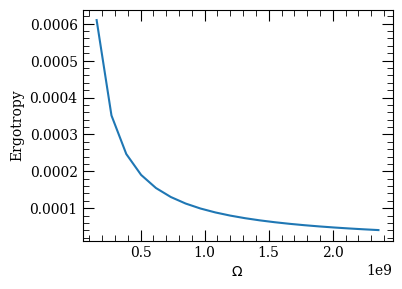

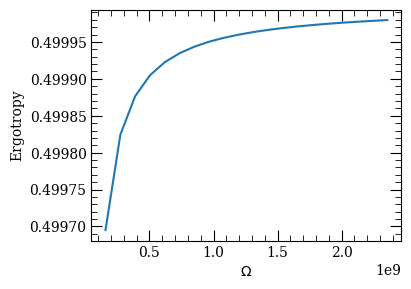

In [22]:
plt.figure(figsize=(4,3))
plt.plot(Omega,(sol_rho2))
plt.ylabel('Ergotropy')
plt.xlabel(r'$\Omega$')
plt.figure(figsize=(4,3))
plt.plot(Omega,(sol_rho3))
plt.ylabel('Ergotropy')
plt.xlabel(r'$\Omega$')

In [15]:
ergotropy

array([3.55207972e+14, 3.55483874e+14, 3.55595530e+14, 3.55655964e+14,
       3.55693846e+14, 3.55719815e+14, 3.55738727e+14, 3.55753114e+14,
       3.55764427e+14, 3.55773556e+14, 3.55781077e+14, 3.55787382e+14,
       3.55792742e+14, 3.55797356e+14, 3.55801370e+14, 3.55804892e+14,
       3.55808009e+14, 3.55810786e+14, 3.55813277e+14, 3.55815522e+14])

/tmp/ipykernel_37066/97614775.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance = curve_fit(func, Omega, ergotropy)


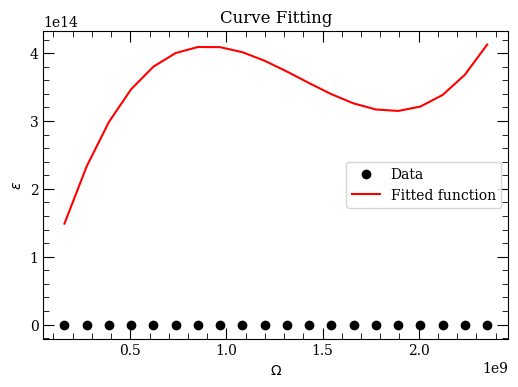

Fitted parameters:
a = 2.131341831152515e-13
b = -0.0008866066968896575
c = 1080937.4176117731
d = 1.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 

def func(x, a, b, c,d):
    return a * x**3 + b * x**2 + c*x + d

# Fit the curve using the synthetic data
params, params_covariance = curve_fit(func, Omega, ergotropy)

# Plot the original synthetic data and the fitted curve
plt.figure(figsize=(6, 4))
plt.scatter(Omega, ergotropy*10**-5, label='Data', color='black')
plt.plot(Omega, func(Omega, *params), label='Fitted function', color='red')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\epsilon$')
plt.legend(loc='best')
plt.title('Curve Fitting')
plt.show()

# Print the parameters of the fitted function
print("Fitted parameters:")
print("a =", params[0])
print("b =", params[1])
print("c =", params[2])
print("d =", params[3])


In [17]:
ergotropy

array([3.55207972e+14, 3.55483874e+14, 3.55595530e+14, 3.55655964e+14,
       3.55693846e+14, 3.55719815e+14, 3.55738727e+14, 3.55753114e+14,
       3.55764427e+14, 3.55773556e+14, 3.55781077e+14, 3.55787382e+14,
       3.55792742e+14, 3.55797356e+14, 3.55801370e+14, 3.55804892e+14,
       3.55808009e+14, 3.55810786e+14, 3.55813277e+14, 3.55815522e+14])

Text(0.5, 0, '$\\Omega$')

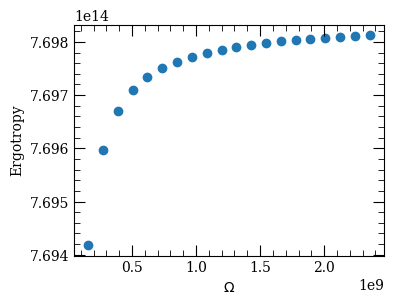

In [18]:
# Constants
hbar = 1.0545718e-34  # Reduced Planck constant, in J*s
k_b = 1.380649e-23  
Gamma31 = atom.getTransitionRate(df.n3.values[1],df.l3.values[1],df.j3.values[1],df.n1.values[1],df.l1.values[1],df.j1.values[1],df.Te.values[1]*5778)         # Given constant (unit/s)
Gamma23 = atom.getTransitionRate(df.n2.values[1],df.l2.values[1],df.j2.values[1],df.n3.values[1],df.l3.values[1],df.j3.values[1],df.Te.values[1]*5778)       # Given constant (unit/s)
omega13 = atom.getTransitionFrequency(df.n1.values[1],df.l1.values[1],df.j1.values[1],df.n3.values[1],df.l3.values[1],df.j3.values[1])      # Angular frequency for transition 13, in Hz
omega23 = atom.getTransitionFrequency(df.n2.values[1],df.l2.values[1],df.j2.values[1],df.n3.values[1],df.l3.values[1],df.j3.values[1])      # Angular frequency for transition 23, in Hz
T13 = df.Te.values[1]*5778       # Temperature for transition 13, in K
T23 = df.Te.values[1]*5778            # Temperature for transition 23, in K

# Compute R13 and R23
R13 = Gamma31 / (np.exp((hbar * omega13) / (k_b * T13)) - 1)
R23 = Gamma23 / (np.exp((hbar * omega23) / (k_b * T23)) - 1)


Omega = np.linspace(1e8,15e8,20)/2*np.pi

sol_rho1 = np.array((Omega + R23)/(2*Omega + 3*R23))
sol_rho2 = np.array(R23/(2*Omega + 3*R23))
sol_rho3 = np.array((Omega + R23)/(2*Omega + 3*R23))
e_1 = atom.getEnergy(df.n1.values[1],df.l1.values[1],df.j1.values[1])*2.41804*10e14 #converted to Hz.
e_2 = atom.getEnergy(df.n2.values[1],df.l2.values[1],df.j2.values[1])*2.41804*10e14 #converted to Hz.
e_3 = atom.getEnergy(df.n3.values[1],df.l3.values[1],df.j3.values[1])*2.41804*10e14 #converted to Hz.
result_matrix_energy = [np.diag([e_1, e_2, e_3])]
result_matrix_pop_ss = [np.diag([sol_rho1[i], sol_rho2[i], sol_rho3[i]]) for i in range(len(Omega))]
result_final_population = np.matmul(result_matrix_energy,result_matrix_pop_ss)

def sort_diagonal(matrix_list):
    sorted_matrices = []

    for matrix in matrix_list:
        # Extract diagonal elements
        diagonal = np.diagonal(matrix)

        # Sort diagonal elements in decreasing order
        sorted_diagonal = np.sort(diagonal)[::-1]

        # Replace diagonal elements with sorted values
        sorted_matrix = np.copy(matrix)
        np.fill_diagonal(sorted_matrix, sorted_diagonal)

        sorted_matrices.append(sorted_matrix)

    return sorted_matrices


sorted_matrices = sort_diagonal(result_matrix_pop_ss)


sorted_result_matrix_pop_ss = [np.diag(np.sort(np.diag(matrix))) for matrix in result_matrix_pop_ss]
result_final_passive = np.matmul(result_matrix_energy,sorted_matrices)
traces_pop = [np.trace (matrix) for matrix in result_final_population]
traces_passive = [np.trace (matrix) for matrix in result_final_passive]

ergotropy2 = np.array(traces_pop) - np.array(traces_passive)
plt.figure(figsize=(4,3))
plt.scatter(Omega,ergotropy2)
plt.ylabel('Ergotropy')
plt.xlabel(r'$\Omega$')

Text(0.5, 0, '$\\Omega$')

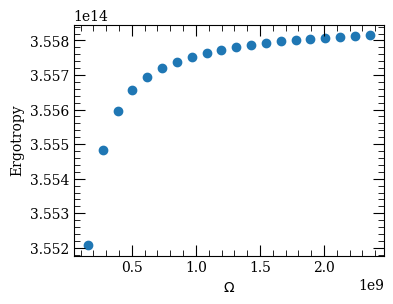

In [19]:
plt.figure(figsize=(4,3))
plt.scatter(Omega,ergotropy)
plt.ylabel('Ergotropy')
plt.xlabel(r'$\Omega$')

/tmp/ipykernel_37066/2059168746.py:9: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * Omega + c) + d


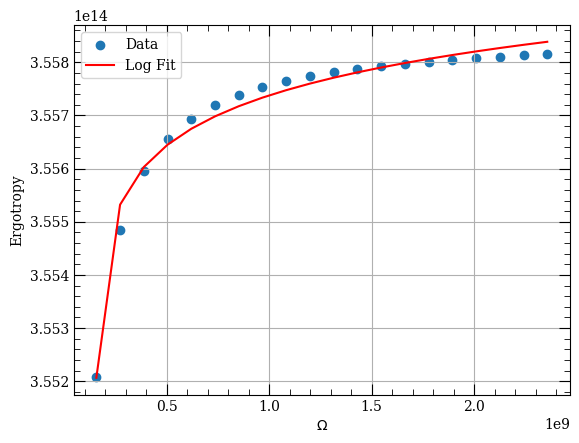

In [20]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



# Define the logarithmic model
def log_model(Omega, a, b, c, d):
    return a * np.log(b * Omega + c) + d

# Fit the model to the data
popt, pcov = curve_fit(log_model, Omega, ergotropy, p0=[1e14, 1e-9, 1, 7.694e14], maxfev=5000)


# Plot the data and the fit
plt.scatter(Omega, ergotropy, label='Data')
plt.plot(Omega, log_model(Omega, *popt), 'r-', label='Log Fit')
plt.xlabel(r'$\Omega$')
plt.ylabel('Ergotropy')
plt.legend()
plt.grid(True)
plt.show()


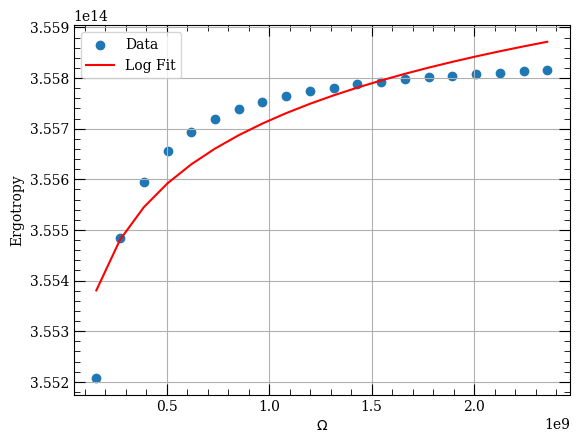

In [21]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



# Define the logarithmic model
def log_model(Omega, a, d):
    return a *np.log(Omega) + d

# Fit the model to the data
popt, pcov = curve_fit(log_model, Omega, ergotropy, p0=[1e14, 7.694e14], maxfev=5000)


# Plot the data and the fit
plt.scatter(Omega, ergotropy, label='Data')
plt.plot(Omega, log_model(Omega, *popt), 'r-', label='Log Fit')
plt.xlabel(r'$\Omega$')
plt.ylabel('Ergotropy')
plt.legend()
plt.grid(True)
plt.show()


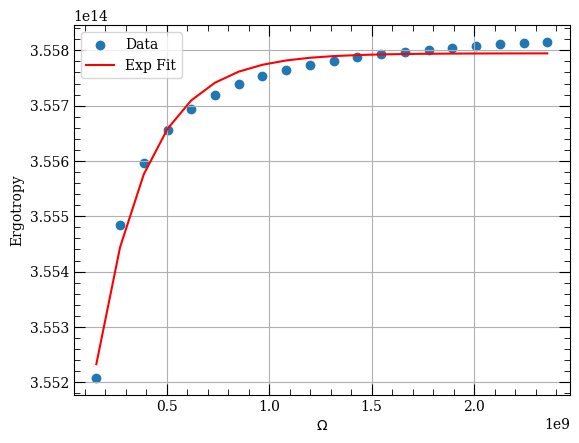

In [22]:
# Define the exponential saturation model
def exp_model(Omega, a, b, c):
    return a * (1 - np.exp(-b * Omega)) + c

# Fit the model to the data
popt, pcov = curve_fit(exp_model, Omega, ergotropy, p0=[1e14, 1e-9, 7.694e14], maxfev=5000)

# Plot the data and the fit
plt.scatter(Omega, ergotropy, label='Data')
plt.plot(Omega, exp_model(Omega, *popt), 'r-', label='Exp Fit')
plt.xlabel(r'$\Omega$')
plt.ylabel('Ergotropy')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
popt

array([1.06630769e+12, 4.07750618e-09, 3.54728338e+14])

/tmp/ipykernel_37066/891021645.py:3: RuntimeWarning: invalid value encountered in sqrt
  return a * np.log((b*Omega)**0.5 + c) + d
/tmp/ipykernel_37066/891021645.py:3: RuntimeWarning: invalid value encountered in log
  return a * np.log((b*Omega)**0.5 + c) + d
/tmp/ipykernel_37066/891021645.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_log, _log = curve_fit(log_model, Omega, ergotropy, p0=[1e13, 1e-9, 0.1, 7.694e14,0.5], maxfev=5000)


Log Model RSS: 4.0082200113133335e+21, R²: 0.9902637847788595
Exp Model RSS: 6.247478550285303e+21, R²: 0.9848244867838214


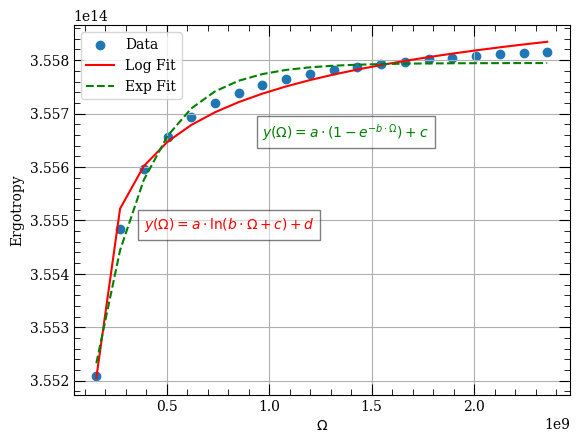

In [24]:
# Define the logarithmic model
def log_model(Omega, a, b, c, d,n):
    return a * np.log((b*Omega)**0.5 + c) + d

# Define the exponential saturation model
def exp_model(Omega, a, b, c):
    return a * (1 - np.exp(-b * Omega)) + c

# Fit both models to the data
popt_log, _log = curve_fit(log_model, Omega, ergotropy, p0=[1e13, 1e-9, 0.1, 7.694e14,0.5], maxfev=5000)
popt_exp, _ = curve_fit(exp_model, Omega, ergotropy, p0=[1e14, 1e-9, 7.694e14], maxfev=5000)

# Calculate RSS for both models
residuals_log = ergotropy - log_model(Omega, *popt_log)
RSS_log = np.sum(residuals_log**2)

residuals_exp = ergotropy - exp_model(Omega, *popt_exp)
RSS_exp = np.sum(residuals_exp**2)

# Calculate R-squared for both models
ss_tot = np.sum((ergotropy - np.mean(ergotropy))**2)
r_squared_log = 1 - (RSS_log / ss_tot)
r_squared_exp = 1 - (RSS_exp / ss_tot)

# Print the results
print(f"Log Model RSS: {RSS_log}, R²: {r_squared_log}")
print(f"Exp Model RSS: {RSS_exp}, R²: {r_squared_exp}")

# Determine the best fit
# if RSS_log < RSS_exp:
#     print("Logarithmic model provides a better fit.")
# else:
#     print("Exponential saturation model provides a better fit.")
# plt.figure(figsize=(4,3))
# Plot both fits for comparison
plt.scatter(Omega, ergotropy, label='Data')
plt.plot(Omega, log_model(Omega, *popt_log), 'r-', label='Log Fit')
plt.plot(Omega, exp_model(Omega, *popt_exp), 'g--', label='Exp Fit')
# Add the equations to the plot, positioning within the visible range
log_eqn = r"$y(\Omega) = a \cdot \ln(b \cdot \Omega + c) + d$"
exp_eqn = r"$y(\Omega) = a \cdot \left(1 - e^{-b \cdot \Omega}\right) + c$"
plt.text(Omega[2], ergotropy[1], log_eqn, fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.5))
plt.text(Omega[7], ergotropy[3], exp_eqn, fontsize=10, color='green', bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel(r'$\Omega$')
plt.ylabel('Ergotropy')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
popt_log

array([ 1.49660325e+11,  2.56489199e-10, -1.91965334e-01,  3.55914531e+14,
        5.00000000e-01])

In [26]:
np.sqrt((np.diag(_)))

array([6.45533585e+10, 2.64811952e-10, 6.62448421e+10])

/tmp/ipykernel_37066/489836386.py:5: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * Omega + c) + d


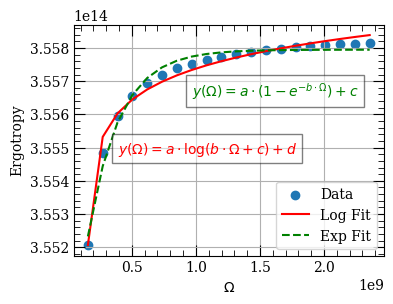

In [27]:
plt.figure(figsize=(4,3))

# Define the logarithmic model
def log_model(Omega, a, b, c, d):
    return a * np.log(b * Omega + c) + d

# Define the exponential saturation model
def exp_model(Omega, a, b, c):
    return a * (1 - np.exp(-b * Omega)) + c

# Fit both models to the data
popt_log, _ = curve_fit(log_model, Omega, ergotropy, p0=[1e13, 1e-9, 0.1, 7.694e14], maxfev=5000)
popt_exp, _ = curve_fit(exp_model, Omega, ergotropy, p0=[1e14, 1e-9, 7.694e14], maxfev=5000)

# Plot both fits for comparison
plt.scatter(Omega, ergotropy, label='Data')
plt.plot(Omega, log_model(Omega, *popt_log), 'r-', label='Log Fit')
plt.plot(Omega, exp_model(Omega, *popt_exp), 'g--', label='Exp Fit')

# Add the equations to the plot, positioning within the visible range
# Add the equations to the plot, positioning within the visible range
log_eqn = r"$y(\Omega) = a \cdot \log(b \cdot \Omega + c) + d$"
exp_eqn = r"$y(\Omega) = a \cdot \left(1 - e^{-b \cdot \Omega}\right) + c$"
plt.text(Omega[2], ergotropy[1], log_eqn, fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.5))
plt.text(Omega[7], ergotropy[3], exp_eqn, fontsize=10, color='green', bbox=dict(facecolor='white', alpha=0.5))

# Add labels and grid
plt.xlabel(r'$\Omega$')
plt.ylabel('Ergotropy')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 0, '$\\Omega$')

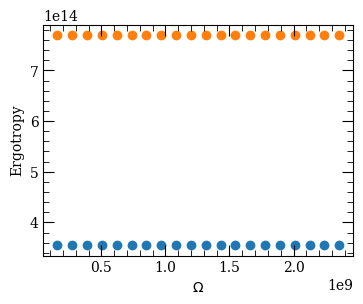

In [28]:
plt.figure(figsize=(4,3))
plt.scatter(Omega,ergotropy)
plt.scatter(Omega,ergotropy2)
plt.ylabel('Ergotropy')
plt.xlabel(r'$\Omega$')

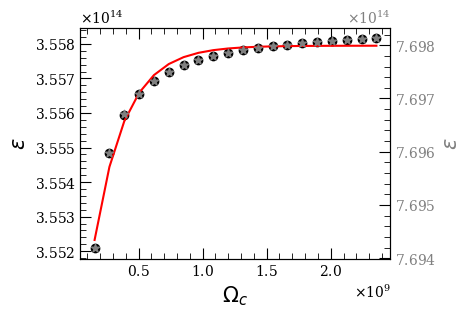

In [29]:
fig, ax1 = plt.subplots(figsize=(4,3))

# Plot ergotropy on the left y-axis
ax1.scatter(Omega, ergotropy, color='k', label='$\epsilon$')
plt.plot(Omega, exp_model(Omega, *popt), 'r-', label='Exp Fit')
ax1.set_xlabel(r'$\Omega_c$',fontsize=15)
ax1.set_ylabel('$\epsilon$', color='k',fontsize=15)
ax1.tick_params(axis='y', labelcolor='k')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Create a second y-axis for ergotropy2
ax2 = ax1.twinx()
ax2.scatter(Omega, ergotropy2,color='grey',marker='*', label='$\epsilon$')
# plt.plot(Omega, exp_model(Omega, *popt), 'r-', label='Exp Fit')
ax2.set_ylabel('$\epsilon$', color='grey',fontsize=15)
ax2.tick_params(axis='y', labelcolor='grey')
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
# fig.tight_layout()
plt.show()

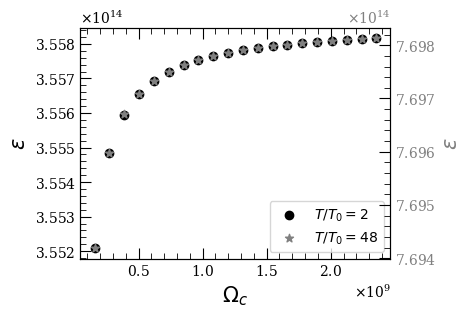

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming Omega, ergotropy, and ergotropy2 are defined

fig, ax1 = plt.subplots(figsize=(4, 3))

# Plot ergotropy on the left y-axis
scatter1 = ax1.scatter(Omega, ergotropy, color='k', label='$T/T_0 = 2$')
# plot1 = ax1.plot(Omega, exp_model(Omega, *popt), 'r-', label='Fitted')
ax1.set_xlabel(r'$\Omega_c$', fontsize=15)
ax1.set_ylabel('$\epsilon$', color='k', fontsize=15)
ax1.tick_params(axis='y', labelcolor='k')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Create a second y-axis for ergotropy2
ax2 = ax1.twinx()
scatter2 = ax2.scatter(Omega, ergotropy2, color='grey', marker='*', label='$T/T_0 = 48$')

ax2.set_ylabel('$\epsilon$', color='grey', fontsize=15)
ax2.tick_params(axis='y', labelcolor='grey')
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Add legend
scatters = [scatter1, scatter2]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.show()


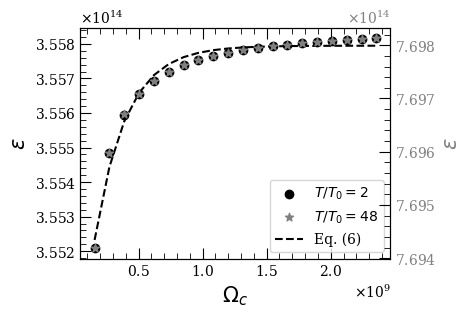

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming Omega, ergotropy, and ergotropy2 are defined

fig, ax1 = plt.subplots(figsize=(4, 3))

# Plot ergotropy on the left y-axis
scatter1 = ax1.scatter(Omega, ergotropy, color='k', label='$T/T_0 = 2$')
plot1, = ax1.plot(Omega, exp_model(Omega, *popt), 'k--', label='Eq. (6)')  # Note the comma to unpack the line object
ax1.set_xlabel(r'$\Omega_c$', fontsize=15)
ax1.set_ylabel('$\epsilon$', color='k', fontsize=15)
ax1.tick_params(axis='y', labelcolor='k')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Create a second y-axis for ergotropy2
ax2 = ax1.twinx()
scatter2 = ax2.scatter(Omega, ergotropy2, color='grey', marker='*', label='$T/T_0 = 48$')

ax2.set_ylabel('$\epsilon$', color='grey', fontsize=15)
ax2.tick_params(axis='y', labelcolor='grey')
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Add legend
scatters = [scatter1, scatter2, plot1]  # plot1 is no longer a list
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.show()


In [33]:
2e8+1.32768e14

132768200000000.0

In [34]:
df

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
60830,6,3,3.5,9,1,1.5,12,2,2.5,0.1736,0.5365,37,85,1203.6756,2.0029
49336,6,3,3.5,7,1,1.5,14,2,2.5,0.1736,1.0211,37,85,444.9924,48.6208


/tmp/ipykernel_368403/1712298288.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(Omega,ergotropy/ergotropy2)


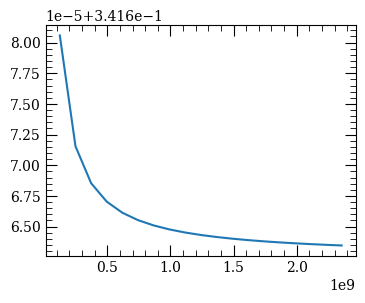

In [35]:
plt.figure(figsize=(4,3))
plt.plot(Omega,ergotropy/ergotropy2)

In [36]:
ergotropy2

array([0.00000000e+00, 7.69305522e+14, 7.69573147e+14, 7.69662397e+14,
       7.69707030e+14, 7.69733812e+14, 7.69751668e+14, 7.69764422e+14,
       7.69773989e+14, 7.69781429e+14, 7.69787382e+14, 7.69792252e+14,
       7.69796311e+14, 7.69799745e+14, 7.69802689e+14, 7.69805240e+14,
       7.69807472e+14, 7.69809442e+14, 7.69811193e+14, 7.69812759e+14])

In [37]:
Omega

array([0.00000000e+00, 1.24010236e+08, 2.48020473e+08, 3.72030709e+08,
       4.96040945e+08, 6.20051182e+08, 7.44061418e+08, 8.68071654e+08,
       9.92081891e+08, 1.11609213e+09, 1.24010236e+09, 1.36411260e+09,
       1.48812284e+09, 1.61213307e+09, 1.73614331e+09, 1.86015354e+09,
       1.98416378e+09, 2.10817402e+09, 2.23218425e+09, 2.35619449e+09])

In [38]:
ergotropy

array([0.00000000e+00, 2.62856756e+14, 2.62941249e+14, 2.62969426e+14,
       2.62983516e+14, 2.62991971e+14, 2.62997608e+14, 2.63001635e+14,
       2.63004655e+14, 2.63007004e+14, 2.63008883e+14, 2.63010421e+14,
       2.63011702e+14, 2.63012786e+14, 2.63013715e+14, 2.63014521e+14,
       2.63015226e+14, 2.63015847e+14, 2.63016400e+14, 2.63016895e+14])

In [9]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from arc import *

# # Constants
# hbar = 1.0545718e-34  # Reduced Planck constant, in J*s
# k_b = 1.380649e-23  

# # # Function to map atom name to ARC library class
# # def get_atom_object(atom_name):
# #     if atom_name == "Hydrogen()":
# #         return Hydrogen()
# #     elif atom_name == "Lithium6()":
# #         return Lithium6()
# #     elif atom_name == "Lithium7()":
# #         return Lithium7()
# #     elif atom_name == "Sodium()":
# #         return Sodium()
# #     elif atom_name == "Potassium39()":
# #         return Potassium39()
# #     elif atom_name == "Potassium40()":
# #         return Potassium40()
# #     elif atom_name == "Potassium41()":
# #         return Potassium41()
# #     elif atom_name == "Rubidium85()":
# #         return Rubidium85()
# #     elif atom_name == "Rubidium87()":
# #         return Rubidium87()
# #     elif atom_name == "Caesium()":
# #         return Caesium()
# #     else:
# #         raise ValueError(f"Unknown atom: {atom_name}")

# # Function to calculate ergotropy for each case in the dataframe
# def calculate_ergotropy(row):
#     n1, l1, j1 = row['n1'], row['l1'], row['j1']
#     n2, l2, j2 = row['n2'], row['l2'], row['j2']
#     n3, l3, j3 = row['n3'], row['l3'], row['j3']
#     Te = row['Te']
# #     atom = get_atom_object(row['Atom'])

#     T13 = T23 = Te

#     try:
#         Gamma31 = atom.getTransitionRate(n3, l3, j3, n1, l1, j1, T13)
#         Gamma23 = atom.getTransitionRate(n2, l2, j2, n3, l3, j3, T23)
#         omega13 = atom.getTransitionFrequency(n1, l1, j1, n3, l3, j3)
#         omega23 = atom.getTransitionFrequency(n2, l2, j2, n3, l3, j3)
#         e_1 = atom.getEnergy(n1, l1, j1)
#         e_2 = atom.getEnergy(n2, l2, j2)
#         e_3 = atom.getEnergy(n3, l3, j3)
#     except Exception as e:
#         print(f"Error calculating transitions for {row['Atom']}: {e}")
#         return np.full(len(Omega), np.nan)

#     R13 = Gamma31 / (np.exp((hbar * omega13) / (k_b * T13)) - 1)
#     R23 = Gamma23 / (np.exp((hbar * omega23) / (k_b * T23)) - 1)

#     sol_rho1 = (Omega + R23) / (2 * Omega + 3 * R23)
#     sol_rho2 = R23 / (2 * Omega + 3 * R23)
#     sol_rho3 = (Omega + R23) / (2 * Omega + 3 * R23)

#     result_matrix_energy = np.diag([e_1, e_2, e_3])
#     result_matrix_pop_ss = [np.diag([sol_rho1[i], sol_rho2[i], sol_rho3[i]]) for i in range(len(Omega))]
#     result_final_population = [np.matmul(result_matrix_energy, pop_ss) for pop_ss in result_matrix_pop_ss]

#     def sort_diagonal(matrix_list):
#         sorted_matrices = []
#         for matrix in matrix_list:
#             diagonal = np.diagonal(matrix)
#             sorted_diagonal = np.sort(diagonal)[::-1]
#             sorted_matrix = np.copy(matrix)
#             np.fill_diagonal(sorted_matrix, sorted_diagonal)
#             sorted_matrices.append(sorted_matrix)
#         return sorted_matrices

#     sorted_matrices = sort_diagonal(result_matrix_pop_ss)
#     result_final_passive = [np.matmul(result_matrix_energy, sorted_matrix) for sorted_matrix in sorted_matrices]

#     traces_pop = [np.trace(matrix) for matrix in result_final_population]
#     traces_passive = [np.trace(matrix) for matrix in result_final_passive]

#     ergotropy = np.array(traces_pop) - np.array(traces_passive)
    
#     return ergotropy


# # Define Omega
# Omega = np.linspace(1e8, 15e9, 20) / (2 * np.pi)

# # Calculate ergotropy for each row in the dataframe
# ergotropy_list = df.apply(calculate_ergotropy, axis=1)
# ergotropy_df = pd.DataFrame(ergotropy_list.tolist())

# # Display the ergotropy for each case
# # print(ergotropy_df)
# plt.plot(Omega, ergotropy_df.T)
# plt.xlabel('Omega (rad/s)')
# plt.ylabel('Ergotropy')
# plt.title('Ergotropy vs Omega')
# plt.show()


In [10]:
# plt.plot(Omega, ergotropy_df.T[0])
# plt.xlabel('Omega (rad/s)')
# plt.ylabel('Ergotropy')
# plt.title('Ergotropy vs Omega')
# plt.show()

In [11]:
# plt.plot(Omega, ergotropy_df.T[5])
# plt.xlabel('Omega (rad/s)')
# plt.ylabel('Ergotropy')
# plt.title('Ergotropy vs Omega')
# plt.show()

In [33]:
# Define the variables (ensure these values are set appropriately before use)
R13 = atom.getTransitionRate(df.n3.values[0],df.l3.values[0],df.j3.values[0],df.n1.values[0],df.l1.values[0],df.j1.values[0],df.Te.values[0]*5778)         # Given constant (unit/s)
R23 = atom.getTransitionRate(df.n2.values[0],df.l2.values[0],df.j2.values[0],df.n3.values[0],df.l3.values[0],df.j3.values[0],df.Te.values[0]*5778)  # Rate for |2⟩ to |3⟩ transition
G31 = 
G32 = 
Omega = np.linspace(1e8,15e8,20)/2*np.pi

# Define the dephasing rates based on the image equations
gamma21 = R13 + R23
gamma31 = G31 + G32 + R23 + 2 * R13
gamma32 = G31 + G32 + 2 * R23 + R13

# Calculate the terms for the denominator
denominator = (
    R23 * G31 * gamma32 +
    R13 * G32 * (3 * R23 + G32) +
    (3 * R13 + G31) * Omega**2
)

# Calculate the density matrix elements
rho_11 = (
    (R13 + G31) * (R23 * gamma32 + Omega**2) /
    denominator
)

rho_22 = (
    R13 * (G32 * (R23 + G32) + Omega**2) /
    denominator
)

rho_33 = (
    R13 * (R23 * gamma32 + Omega**2) /
    denominator
)

# Output the results
print(f"ρ_11: {rho_11}")
print(f"ρ_22: {rho_22}")
print(f"ρ_33: {rho_33}")


ValueError: For non-zero temperatures, user has to specify principal quantum number of the maximum state *above* the state for which we are calculating the lifetime. This is in order to include black-body induced transitions to  higher lying up in energy levels.

In [32]:
atom.getStateLifetime?

In [34]:
import numpy as np
from arc import Rubidium87

# Initialize the atom
atom = Rubidium87()

# Example: Define quantum states (replace these with actual values or DataFrame values)
n3, l3, j3 = 30, 1, 1.5  # |3⟩ state quantum numbers
n2, l2, j2 = 30, 2, 2.5  # |2⟩ state quantum numbers
n1, l1, j1 = 5, 0, 0.5   # |1⟩ state quantum numbers
temperature = 5778       # Example temperature in Kelvin (e.g., effective blackbody temperature)

# Calculate spontaneous emission rates (Gamma)
G31 = atom.getTransitionRate(n3, l3, j3, n1, l1, j1)
G32 = atom.getTransitionRate(n3, l3, j3, n2, l2, j2)

# Calculate pumping rates (R) with temperature effects
R13 = atom.getTransitionRate(n3, l3, j3, n1, l1, j1, temperature)
R23 = atom.getTransitionRate(n3, l3, j3, n2, l2, j2, temperature)

# Define Rabi frequency (Omega)
Omega = np.linspace(1e8, 15e8, 20) / (2 * np.pi)  # Convert Hz to angular frequency

# Calculate dephasing rates
gamma21 = R13 + R23
gamma31 = G31 + G32 + R23 + 2 * R13
gamma32 = G31 + G32 + 2 * R23 + R13

# Calculate the terms for the denominator
denominator = (
    R23 * G31 * gamma32 +
    R13 * G32 * (3 * R23 + G32) +
    (3 * R13 + G31) * Omega**2
)

# Calculate the density matrix elements
rho_11 = (
    (R13 + G31) * (R23 * gamma32 + Omega**2) /
    denominator
)

rho_22 = (
    R13 * (G32 * (R23 + G32) + Omega**2) /
    denominator
)

rho_33 = (
    R13 * (R23 * gamma32 + Omega**2) /
    denominator
)

# Output the results
print(f"Spontaneous Decay Rates:")
print(f"Gamma_31 (|3⟩ → |1⟩): {G31:.3e} Hz")
print(f"Gamma_32 (|3⟩ → |2⟩): {G32:.3e} Hz\n")

print(f"Pumping Rates:")
print(f"R13 (|1⟩ → |3⟩): {R13:.3e} Hz")
print(f"R23 (|2⟩ → |3⟩): {R23:.3e} Hz\n")

print(f"Dephasing Rates:")
print(f"gamma21: {gamma21:.3e} Hz")
print(f"gamma31: {gamma31:.3e} Hz")
print(f"gamma32: {gamma32:.3e} Hz\n")

print(f"Density Matrix Elements:")
print(f"ρ_11: {rho_11}")
print(f"ρ_22: {rho_22}")
print(f"ρ_33: {rho_33}")


Spontaneous Decay Rates:
Gamma_31 (|3⟩ → |1⟩): 1.519e+03 Hz
Gamma_32 (|3⟩ → |2⟩): 0.000e+00 Hz

Pumping Rates:
R13 (|1⟩ → |3⟩): 1.519e+03 Hz
R23 (|2⟩ → |3⟩): 9.597e+00 Hz

Dephasing Rates:
gamma21: 1.529e+03 Hz
gamma31: 4.566e+03 Hz
gamma32: 3.057e+03 Hz

Density Matrix Elements:
ρ_11: [0.49997053 0.49997053 0.49997053 0.49997053 0.49997053 0.49997053
 0.49997053 0.49997053 0.49997053 0.49997053 0.49997053 0.49997053
 0.49997053 0.49997053 0.49997053 0.49997053 0.49997053 0.49997053
 0.49997053 0.49997053]
ρ_22: [0.25001473 0.25001473 0.25001473 0.25001473 0.25001473 0.25001473
 0.25001473 0.25001473 0.25001473 0.25001473 0.25001473 0.25001473
 0.25001473 0.25001473 0.25001473 0.25001473 0.25001473 0.25001473
 0.25001473 0.25001473]
ρ_33: [0.25001473 0.25001473 0.25001473 0.25001473 0.25001473 0.25001473
 0.25001473 0.25001473 0.25001473 0.25001473 0.25001473 0.25001473
 0.25001473 0.25001473 0.25001473 0.25001473 0.25001473 0.25001473
 0.25001473 0.25001473]


In [35]:
rho_11 + rho_22 + rho_33

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

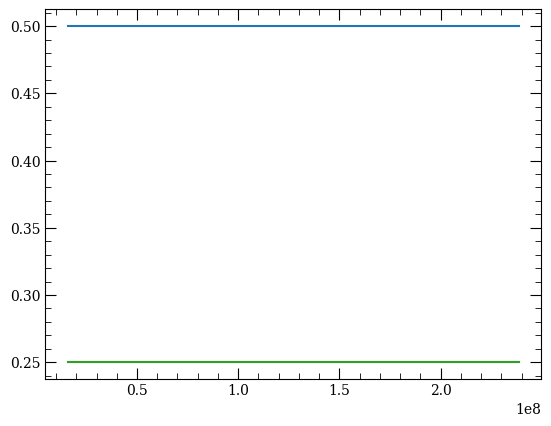

In [39]:
plt.plot(Omega,rho_11)
plt.plot(Omega,rho_22)
plt.plot(Omega,rho_33)

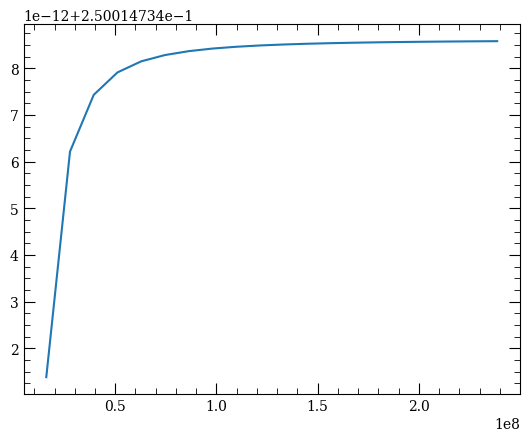

In [37]:
plt.plot(Omega,rho_22)

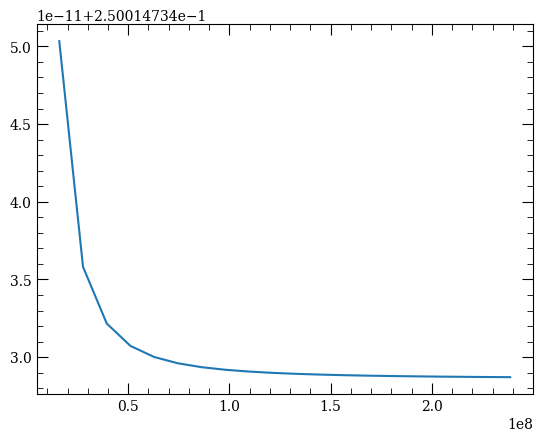

In [38]:
plt.plot(Omega,rho_33)

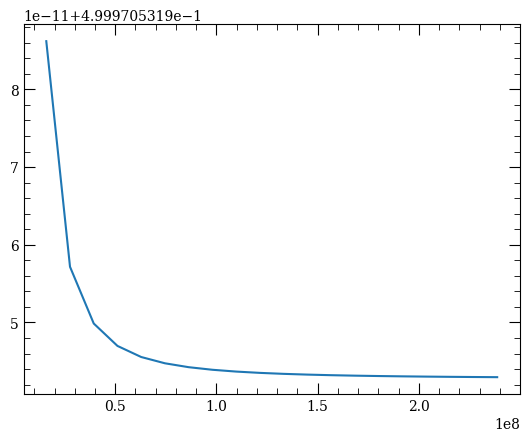

In [40]:
plt.plot(Omega,rho_11)

Spontaneous Emission Rates:
G31 (|3⟩ → |1⟩): 3.024e+04 Hz
G32 (|3⟩ → |2⟩): 1.867e+04 Hz

Pumping Rates:
R13 (|1⟩ → |3⟩): 9.202e+04 Hz
R23 (|2⟩ → |3⟩): 4.183e+04 Hz

Dephasing Rates:
gamma21: 1.338e+05 Hz
gamma31: 2.748e+05 Hz
gamma32: 2.246e+05 Hz



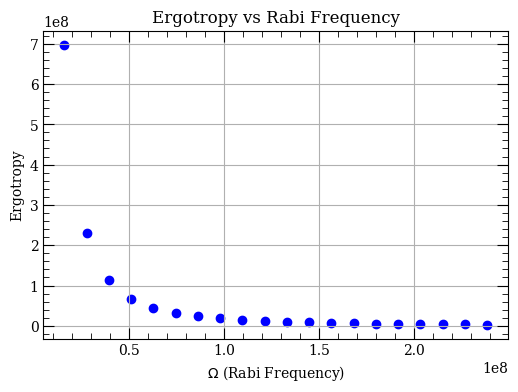

In [41]:
# Constants
hbar = 1.0545718e-34  # Reduced Planck constant, in J*s
k_b = 1.380649e-23    # Boltzmann constant, in J/K

# Initialize atom and DataFrame (df must be defined with quantum state and temperature values)
atom = Rubidium87()

# Quantum states and temperature
n1, l1, j1 = df.n1.values[0], df.l1.values[0], df.j1.values[0]
n2, l2, j2 = df.n2.values[0], df.l2.values[0], df.j2.values[0]
n3, l3, j3 = df.n3.values[0], df.l3.values[0], df.j3.values[0]
T13 = T23 = df.Te.values[0] * 5778  # Temperature in Kelvin
# Calculate spontaneous emission rates (Gamma)
G31 = atom.getTransitionRate(n3, l3, j3, n1, l1, j1)  # |3⟩ → |1⟩
G32 = atom.getTransitionRate(n3, l3, j3, n2, l2, j2)  # |3⟩ → |2⟩

# Calculate pumping rates (R) with temperature effects
R13 = atom.getTransitionRate(n3, l3, j3, n1, l1, j1, temperature)  # |1⟩ → |3⟩
R23 = atom.getTransitionRate(n3, l3, j3, n2, l2, j2, temperature)  # |2⟩ → |3⟩

# Define Rabi frequency (Omega)
Omega = np.linspace(1e8, 15e8, 20) / (2 * np.pi)  # Convert Hz to angular frequency

# Calculate dephasing rates
gamma21 = R13 + R23
gamma31 = G31 + G32 + R23 + 2 * R13
gamma32 = G31 + G32 + 2 * R23 + R13

# Calculate the terms for the denominator
denominator = (
    R23 * G31 * gamma32 +
    R13 * G32 * (3 * R23 + G32) +
    (3 * R13 + G31) * Omega**2
)

# Calculate the density matrix elements
rho_11 = (
    (R13 + G31) * (R23 * gamma32 + Omega**2) /
    denominator
)

rho_22 = (
    R13 * (G32 * (R23 + G32) + Omega**2) /
    denominator
)

rho_33 = (
    R13 * (R23 * gamma32 + Omega**2) /
    denominator
)

# Output results for debugging
print("Spontaneous Emission Rates:")
print(f"G31 (|3⟩ → |1⟩): {G31:.3e} Hz")
print(f"G32 (|3⟩ → |2⟩): {G32:.3e} Hz\n")

print("Pumping Rates:")
print(f"R13 (|1⟩ → |3⟩): {R13:.3e} Hz")
print(f"R23 (|2⟩ → |3⟩): {R23:.3e} Hz\n")

print("Dephasing Rates:")
print(f"gamma21: {gamma21:.3e} Hz")
print(f"gamma31: {gamma31:.3e} Hz")
print(f"gamma32: {gamma32:.3e} Hz\n")

# Energy of states
e_1 = atom.getEnergy(n1, l1, j1) * 2.41804e14  # Energy of |1⟩ in Hz
e_2 = atom.getEnergy(n2, l2, j2) * 2.41804e14  # Energy of |2⟩ in Hz
e_3 = atom.getEnergy(n3, l3, j3) * 2.41804e14  # Energy of |3⟩ in Hz

# Energy matrix
result_matrix_energy = np.diag([e_1, e_2, e_3])

# Compute steady-state population matrices
result_matrix_pop_ss = [np.diag([rho_11[i], rho_22[i], rho_33[i]]) for i in range(len(Omega))]

# Compute final population matrix
result_final_population = [np.matmul(result_matrix_energy, pop) for pop in result_matrix_pop_ss]

# Sort diagonal elements to compute passive state matrices
def sort_diagonal(matrix_list):
    sorted_matrices = []
    for matrix in matrix_list:
        diagonal = np.diagonal(matrix)
        sorted_diagonal = np.sort(diagonal)[::-1]  # Sort in descending order
        sorted_matrix = np.copy(matrix)
        np.fill_diagonal(sorted_matrix, sorted_diagonal)
        sorted_matrices.append(sorted_matrix)
    return sorted_matrices

sorted_matrices = sort_diagonal(result_matrix_pop_ss)
result_final_passive = [np.matmul(result_matrix_energy, sorted_matrix) for sorted_matrix in sorted_matrices]

# Compute traces for population and passive states
traces_pop = [np.trace(matrix) for matrix in result_final_population]
traces_passive = [np.trace(matrix) for matrix in result_final_passive]

# Compute ergotropy
ergotropy = np.array(traces_pop) - np.array(traces_passive)

# Plot the ergotropy as a function of Rabi frequency
plt.figure(figsize=(6, 4))
plt.scatter(Omega, ergotropy, color='blue')
plt.ylabel('Ergotropy')
plt.xlabel(r'$\Omega$ (Rabi Frequency)')
plt.title('Ergotropy vs Rabi Frequency')
plt.grid(True)
plt.show()

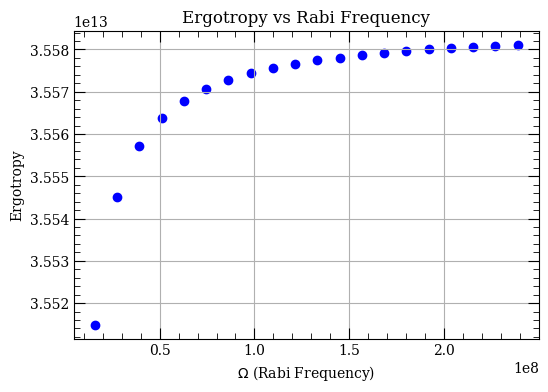

In [43]:
# Constants
hbar = 1.0545718e-34  # Reduced Planck constant, in J*s
k_b = 1.380649e-23    # Boltzmann constant, in J/K

# Initialize atom and DataFrame (df must be defined with quantum state and temperature values)
atom = Rubidium87()

# Quantum states and temperature
n1, l1, j1 = df.n1.values[0], df.l1.values[0], df.j1.values[0]
n2, l2, j2 = df.n2.values[0], df.l2.values[0], df.j2.values[0]
n3, l3, j3 = df.n3.values[0], df.l3.values[0], df.j3.values[0]
T13 = T23 = df.Te.values[0] * 5778  # Temperature in Kelvin

# Compute Gamma (Spontaneous Emission Rates)
Gamma31 = atom.getTransitionRate(n3, l3, j3, n1, l1, j1)  # |3⟩ → |1⟩
Gamma23 = atom.getTransitionRate(n3, l3, j3, n2, l2, j2)  # |3⟩ → |2⟩

# Compute omega (Transition Angular Frequencies)
omega13 = atom.getTransitionFrequency(n1, l1, j1, n3, l3, j3) * 2 * np.pi  # |1⟩ → |3⟩
omega23 = atom.getTransitionFrequency(n2, l2, j2, n3, l3, j3) * 2 * np.pi  # |2⟩ → |3⟩

# Compute R (Pumping Rates)
R13 = Gamma31 *(np.exp((hbar * omega13) / (k_b * T13)) - 1)
R23 = Gamma23* (np.exp((hbar * omega23) / (k_b * T23)) - 1)

# Define Rabi Frequency Omega
Omega = np.linspace(1e8, 15e8, 20) / (2 * np.pi)  # Angular frequency

# Compute Steady-State Populations
sol_rho1 = (Omega + R23) / (2 * Omega + 3 * R23)
sol_rho2 = R23 / (2 * Omega + 3 * R23)
sol_rho3 = (Omega + R23) / (2 * Omega + 3 * R23)

# Energy of states (convert from atomic units to Hz)
e_1 = atom.getEnergy(n1, l1, j1) * 2.41804e14  # Energy of |1⟩ state
e_2 = atom.getEnergy(n2, l2, j2) * 2.41804e14  # Energy of |2⟩ state
e_3 = atom.getEnergy(n3, l3, j3) * 2.41804e14  # Energy of |3⟩ state

# Create matrices for energy and steady-state populations
result_matrix_energy = np.diag([e_1, e_2, e_3])
result_matrix_pop_ss = [np.diag([sol_rho1[i], sol_rho2[i], sol_rho3[i]]) for i in range(len(Omega))]

# Compute final population matrix
result_final_population = [np.matmul(result_matrix_energy, pop) for pop in result_matrix_pop_ss]

# Sort diagonal elements to compute passive state matrices
def sort_diagonal(matrix_list):
    sorted_matrices = []
    for matrix in matrix_list:
        diagonal = np.diagonal(matrix)
        sorted_diagonal = np.sort(diagonal)[::-1]  # Sort in descending order
        sorted_matrix = np.copy(matrix)
        np.fill_diagonal(sorted_matrix, sorted_diagonal)
        sorted_matrices.append(sorted_matrix)
    return sorted_matrices

sorted_matrices = sort_diagonal(result_matrix_pop_ss)
result_final_passive = [np.matmul(result_matrix_energy, sorted_matrix) for sorted_matrix in sorted_matrices]

# Compute traces for population and passive states
traces_pop = [np.trace(matrix) for matrix in result_final_population]
traces_passive = [np.trace(matrix) for matrix in result_final_passive]

# Compute ergotropy
ergotropy = np.array(traces_pop) - np.array(traces_passive)

# Plot the ergotropy as a function of Rabi frequency
plt.figure(figsize=(6, 4))
plt.scatter(Omega, ergotropy, color='blue')
plt.ylabel('Ergotropy')
plt.xlabel(r'$\Omega$ (Rabi Frequency)')
plt.title('Ergotropy vs Rabi Frequency')
plt.grid(True)
plt.show()

In [46]:
import sympy as sp

# Simplify the matrix for faster computation (e.g., assume symmetry)
rho_12, rho_13 = sp.symbols('rho_12 rho_13')
rho_11, rho_22, rho_33 = sp.symbols('rho_11 rho_22 rho_33')

# Assume Hermitian matrix (real diagonal, conjugate symmetry for off-diagonals)
density_matrix_symbolic = sp.Matrix([
    [rho_11, rho_12, rho_13],
    [sp.conjugate(rho_12), rho_22, 0],
    [sp.conjugate(rho_13), 0, rho_33]
])

# Attempt diagonalization
try:
    P, D = density_matrix_symbolic.diagonalize()
    print("Transformation Matrix (P):")
    sp.pprint(P)
    print("\nDiagonal Matrix (D):")
    sp.pprint(D)
except Exception as e:
    print(f"Diagonalization failed: {e}")


KeyboardInterrupt: 